In [1]:
import numpy as np
import jax.numpy as jnp
import jax
import pandas as pd
from typing import NamedTuple

from jax.scipy.special import factorial, gammaln
from jax.scipy.stats import norm

from statsmodels.api import Poisson
from statsmodels.iolib.summary2 import summary_col

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [5]:
@jax.jit
def poisson_pmf(mu, y):
    return mu**y / factorial(y) * jnp.exp(-mu)

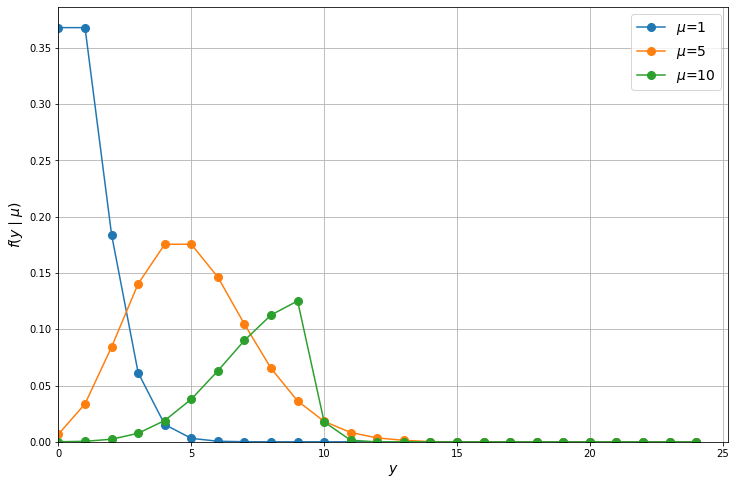

In [17]:
y_values = range(0,25)
fig, ax = plt.subplots(figsize=(12,8))

for mu in [1, 5, 10]:
    distribution = []
    for y_i in y_values:
        distribution.append(poisson_pmf(mu, y_i))
    ax.plot(
        y_values,
        distribution,
        label=rf"$\mu$={mu}",
        marker="o",
        markersize=8
    )

ax.grid()
ax.set_xlabel(r"$y$", fontsize=14)
ax.set_ylabel(r"$f(y \mid \mu)$", fontsize=14)
ax.axis(xmin=0, ymin=0)
ax.legend(fontsize=14)

plt.show()

In [18]:
# Load in data and view
df = pd.read_stata(
    "https://github.com/QuantEcon/lecture-python.myst/raw/refs/heads/main/lectures/_static/lecture_specific/mle/fp.dta"
)
df.head()

,country,ccode,year,cyear,numbil,numbil0,numbilall,netw,netw0,netwall,...,gattwto08,mcapbdol,mcapbdol08,lnmcap08,topintaxnew,topint08,rintr,noyrs,roflaw,nrrents
0,United States,2.0,1990.0,21990.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,3060.000000,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
1,United States,2.0,1991.0,21991.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4090.000000,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
2,United States,2.0,1992.0,21992.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,4490.000000,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
3,United States,2.0,1993.0,21993.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5136.198730,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN
4,United States,2.0,1994.0,21994.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,5067.016113,11737.599609,9.370638,39.799999,39.799999,4.988405,20.0,1.61,NaN


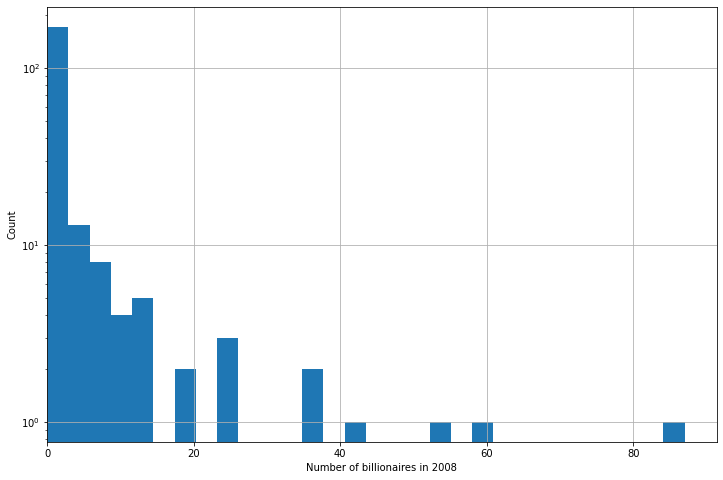

In [29]:
numbil0_2008 = df[
    (df['year']==2008) & (df['country']!='United States')
].loc[:, "numbil0"]

plt.subplots(figsize=(12, 8))
plt.hist(numbil0_2008, bins=30)
plt.xlim(left=0)
plt.grid()
plt.xlabel("Number of billionaires in 2008")
plt.ylabel("Count")
plt.yscale('log')
plt.show()

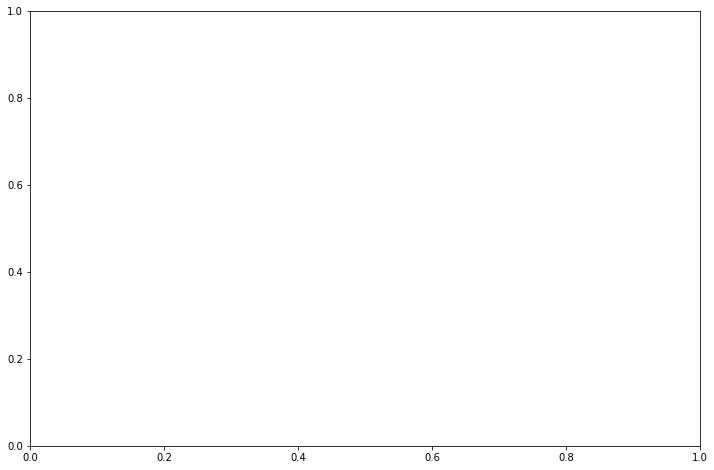

In [ ]:
y_values = range(0, 20)

# Define a parameter vector with estimates
beta = jnp.array([0.26, 0.18, 0.25, -0.1, -0.22])

# Create some observations X
datasets = [
    jnp.array([0, 1, 1, 1, 2]),
    jnp.array([2, 3, 2, 4, 0]),
    jnp.array([3, 4, 5, 3, 2]),
    jnp.array([6, 5, 4, 4, 7]),
]

fig, ax = plt.subplots(figsize=(12, 8))

for X in datasets:
    mu = jnp.exp(X@beta)
    distribution = [poisson_pmf(mu, y_i) for y_i in y_values]
    ax.plot(
        y_values,
        distribution,
        label=rf"$\mu_i={mu:.1}$"
    )